# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
practica2<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
#head(practica2,4)
practica2Replicada <- practica2[rep(row.names(practica2), practica2$count), ]
#nrow(practica2Replicada)

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
#practica2Replicada[sample(nrow(practica2Replicada), 5000), ]
ej2 <- practica2Replicada[sample(nrow(practica2Replicada), 5000), ]

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
ej2$race_eth[ej2$race_eth == "9"] <- "NA"
ej2$first_degree_hx[ej2$first_degree_hx == "9"] <- "NA"
ej2$age_menarche[ej2$age_menarche == "9"] <- "NA"
ej2$age_first_birth[ej2$age_first_birth == "9"] <- "NA"
ej2$BIRADS_breast_density[ej2$BIRADS_breast_density == "9"] <- "NA"
ej2$current_hrt[ej2$current_hrt == "9"] <- "NA"
ej2$menopaus[ej2$menopaus == "9"] <- "NA"
ej2$bmi_group[ej2$bmi_group == "9"] <- "NA"
ej2$biophx[ej2$biophx == "9"] <- "NA"
ej2$breast_cancer_history[ej2$breast_cancer_history == "9"] <- "NA"

cols <- c("race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")
ej2$race_eth <- as.factor(ej2$race_eth)
ej2$first_degree_hx <- as.factor(ej2$first_degree_hx)
ej2$age_menarche <- as.factor(ej2$age_menarche)
ej2$age_first_birth <- as.factor(ej2$age_first_birth)
ej2$BIRADS_breast_density <- as.factor(ej2$BIRADS_breast_density)
ej2$current_hrt <- as.factor(ej2$current_hrt)
ej2$menopaus <- as.factor(ej2$menopaus)
ej2$bmi_group <- as.factor(ej2$bmi_group)
ej2$biophx <- as.factor(ej2$biophx)
ej2$breast_cancer_history <- as.factor(ej2$breast_cancer_history)

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

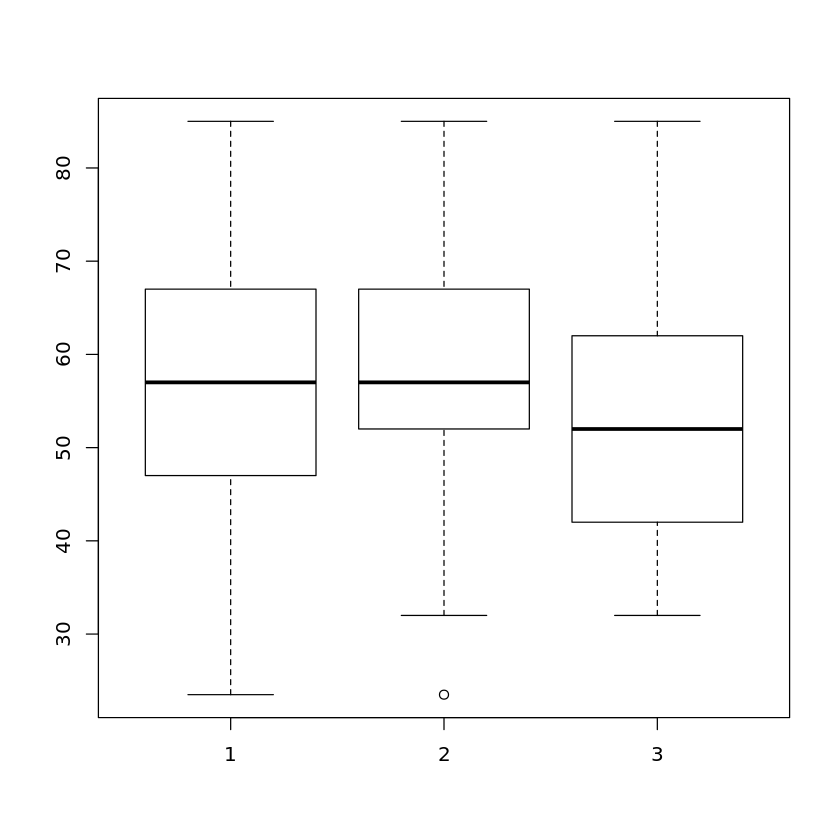

In [5]:
ej2$edad_estimada <- NA
ej2 <- ej2[, c("year", "age_group_5_years", "edad_estimada", "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")]

ej2$edad_estimada[ej2$age_group_5_years == "1"]<-"18-29"
ej2$edad_estimada[ej2$age_group_5_years == "2"]<-"30-34"
ej2$edad_estimada[ej2$age_group_5_years == "3"]<-"35-39"
ej2$edad_estimada[ej2$age_group_5_years == "4"]<-"40-44"
ej2$edad_estimada[ej2$age_group_5_years == "5"]<-"45-49"
ej2$edad_estimada[ej2$age_group_5_years == "6"]<-"50-54"
ej2$edad_estimada[ej2$age_group_5_years == "7"]<-"55-59"
ej2$edad_estimada[ej2$age_group_5_years == "8"]<-"60-64"
ej2$edad_estimada[ej2$age_group_5_years == "9"]<-"65-69"
ej2$edad_estimada[ej2$age_group_5_years == "10"]<-"70-74"
ej2$edad_estimada[ej2$age_group_5_years == "11"]<-"75-79"
ej2$edad_estimada[ej2$age_group_5_years == "12"]<-"80-84"
ej2$edad_estimada[ej2$age_group_5_years == "13"]<-"85"

mid.values <- sapply(strsplit(unique(ej2$edad_estimada), "-"), function(x)mean(as.numeric(x))) # Calculamos media de la edad
               
require(plyr)   # Sustituimos los valores en la tabla.
ej2$edad_estimada <- mapvalues(ej2$edad_estimada, 
          from=unique(ej2$edad_estimada),
          to=mid.values)

ej2[3:13] <- lapply(ej2[3:13], as.numeric)
boxplot(ej2$edad_estimada ~ ej2$first_degree_hx)

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

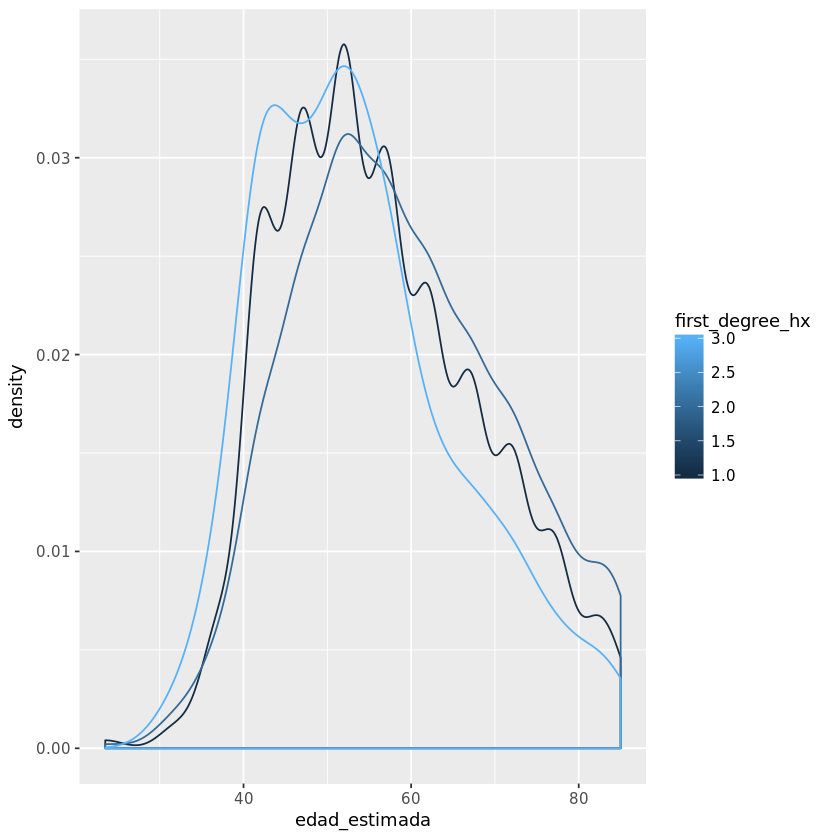

In [6]:
library(ggplot2)
ggplot(data=ej2,aes(x=edad_estimada,group=first_degree_hx,color=first_degree_hx))+geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

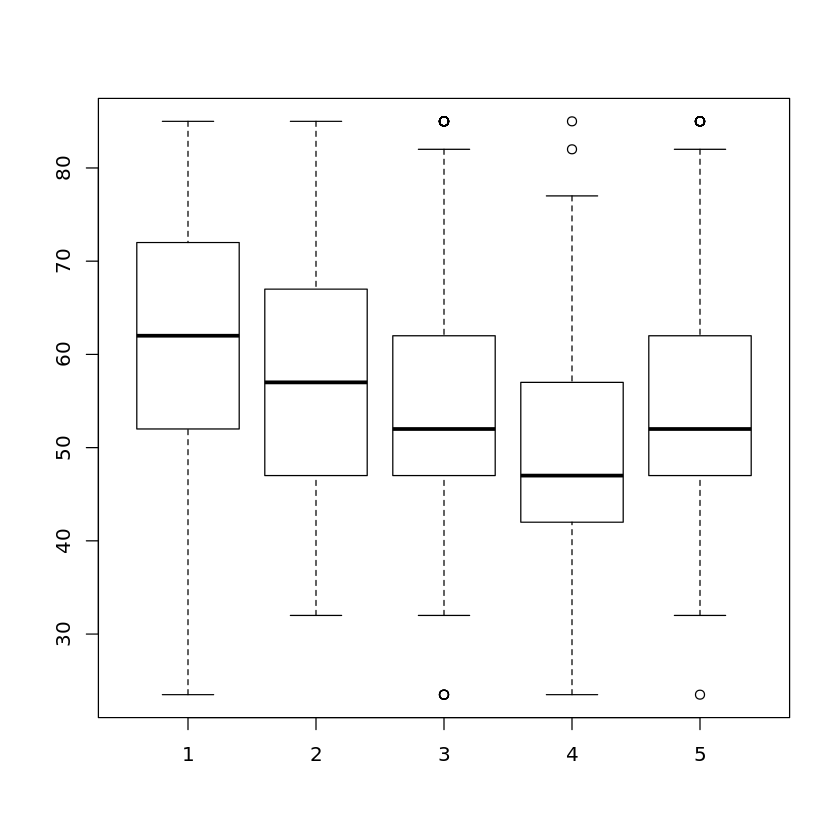

In [7]:
boxplot(ej2$edad_estimada ~ ej2$BIRADS_breast_density)

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [8]:
#head(ej2)
observed<-c(ej2$BIRADS_breast_density)
N<-sum(observed)
expected<-N/length(observed)
test<-sum((observed-expected)^2/expected)

pvalue<-1-pchisq(test,length(observed)-1)
print(paste("El pvalor es",pvalue))

cqt<-chisq.test(ej2)
cqt

[1] "El pvalor es 1"


Warning message in chisq.test(ej2):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  ej2
X-squared = 47603, df = 59988, p-value = 1


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [9]:
ej2$BIRADS_breast_density<-factor(ej2$BIRADS_breast_density,
   labels=c("Almost entirely fat","Scattered fibroglandular densities",
            "Heterogeneously dense","Extremely dense", "Desconocido"))

cancerMasComun<-transform(as.data.frame(table(ej2$BIRADS_breast_density)),proporcion=Freq/nrow(ej2)*100)
cancerMasComun

prop.table(table(cancerMasComun))

Var1,Freq,proporcion
Almost entirely fat,297,5.94
Scattered fibroglandular densities,1665,33.30
Heterogeneously dense,1451,29.02
Extremely dense,256,5.12
Desconocido,1331,26.62


, , proporcion = 5.12

                                    Freq
Var1                                 256 297 1331 1451 1665
  Almost entirely fat                0.0 0.0  0.0  0.0  0.0
  Scattered fibroglandular densities 0.0 0.0  0.0  0.0  0.0
  Heterogeneously dense              0.0 0.0  0.0  0.0  0.0
  Extremely dense                    0.2 0.0  0.0  0.0  0.0
  Desconocido                        0.0 0.0  0.0  0.0  0.0

, , proporcion = 5.94

                                    Freq
Var1                                 256 297 1331 1451 1665
  Almost entirely fat                0.0 0.2  0.0  0.0  0.0
  Scattered fibroglandular densities 0.0 0.0  0.0  0.0  0.0
  Heterogeneously dense              0.0 0.0  0.0  0.0  0.0
  Extremely dense                    0.0 0.0  0.0  0.0  0.0
  Desconocido                        0.0 0.0  0.0  0.0  0.0

, , proporcion = 26.62

                                    Freq
Var1                                 256 297 1331 1451 1665
  Almost entirely fat    

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [11]:
#ej2$first_degree_hx[ej2$first_degree_hx == "3"] <- "NA" # Ya está hecho en el paso 1.
ej2$first_degree_hx<-factor(ej2$first_degree_hx,labels = c("NO", "SI", "NA"))
ej2$BIRADS_breast_density<-factor(ej2$BIRADS_breast_density,labels = c ("A_e_fat", "S_f_d", "H_d",
                                                                        "E_d", "Desconocido"))
tblsol<-table(ej2[,c("first_degree_hx", "BIRADS_breast_density")])
tblsol

               BIRADS_breast_density
first_degree_hx A_e_fat S_f_d  H_d  E_d Desconocido
             NO     223  1324 1135  190         902
             SI      56   248  229   45         159
             NA      18    93   87   21         270

In [13]:
chisq.test(tblsol)


	Pearson's Chi-squared test

data:  tblsol
X-squared = 234.8, df = 8, p-value < 2.2e-16


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [16]:
ej2$race_eth<-factor(ej2$race_eth,labels = c("Non-hisp-w", "Non-hisp-b", "As/Pa Isl", "Nativ-Am", "Hisp", "Other", "NA"))
ej2$BIRADS_breast_density<-factor(ej2$BIRADS_breast_density,labels = c ("A_e_fat", "S_f_d", "H_d",
                                                                        "E_d", "Desconocido"))
tblsol<-table(ej2[,c("race_eth", "BIRADS_breast_density")])
tblsol

            BIRADS_breast_density
race_eth     A_e_fat S_f_d  H_d  E_d Desconocido
  Non-hisp-w     204  1208 1021  179         719
  Non-hisp-b      23   100   92   11          42
  As/Pa Isl       11    51   85   29         208
  Nativ-Am         1     7    6    3           9
  Hisp            26    98   94   11          98
  Other            2    19   15    3          16
  NA              30   182  138   20         239

In [17]:
chisq.test(tblsol)

Warning message in chisq.test(tblsol):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tblsol
X-squared = 299.41, df = 24, p-value < 2.2e-16


¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [54]:
tipoCancerEtnico<-ej2[,c("BIRADS_breast_density", "race_eth")]
tipoCancerEtnico<-na.omit(tipoCancerEtnico)

tmp<-tipoCancerEtnico[tipoCancerEtnico$BIRADS_breast_density == 'A_e_fat' & tipoCancerEtnico$race_eth == 'Nativ-Am', ]
paste0("Numero de casos de cancer Almost entirely fat del grupo etnico Native American: ",nrow(tmp))

tmp2<-tipoCancerEtnico[tipoCancerEtnico$race_eth == 'Nativ-Am', ]
paste0("Numero de casos de cancer del grupo etnico Native American: ",nrow(tmp2))

solucion<-binom.test(1, 26, 1)
solucion

[1] "Numero de casos de cancer Almost entirely fat del grupo etnico Native American: 1"

[1] "Numero de casos de cancer del grupo etnico Native American: 26"


	Exact binomial test

data:  1 and 26
number of successes = 1, number of trials = 26, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 1
95 percent confidence interval:
 0.0009732879 0.1963696468
sample estimates:
probability of success 
            0.03846154 
